# **ASSIGNMENT 2: CLASSIFICATION EMPIRICAL STUDY OF NAIVE BAYES VS LOGISTIC REGRESSION**

This was an assignment completed for the Introduction to AI course. This assingnment was completed in a group of two people.
Portions of this assignment were removed to make it public. This is not a working/full copy of the completed assignment.

# **1. Classification Dataset**

**Dermatology dataset:**

Kaggle: https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification


*   Number of samples: 366
*   Number of attributes: 34
*   Number of classes: 6 disorders
  1. psoriasis
  2. seborrheic dermatitis
  3. lichen planus
  4. pityriasis rosea
  5. chronic dermatitis
  6. pityriasis rubra pilaris












**Import important libraries**

In [ ]:
import pandas as pd
import itertools
import numpy as np
# Useful for calculating precision, recall, micros & macros
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

**Read Dataset**

Link to the dermatology dataset hosted on our public repository:

In [ ]:
#url removed for public repo
#url = "https://raw.githubusercontent.com/{dermatology_database_1.csv}"

dataset = pd.read_csv(url)

Let's see what are the columns of the dataset:

In [ ]:
dataset.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')

Now let's see the first 10 entries (rows):

In [ ]:
dataset.head(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [ ]:
# Scrolling to the right, one can see '?' symbols on the age column
dataset.iloc[[33,34,35,36]] # not limited to these rows, there are 8 total missing rows for age

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

In [ ]:
# Check for null values for each column
dataset.isnull().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

**Remove Missing Rows**

Furthermore, it's possible that certain rows in the dataset contain empty values in specific columns. We also aim to eliminate these rows as they do not provide any useful information. We use dropna() function to do so:

In [ ]:
#Ignore the warning messages.

# drop rows with empty values
dataset = dataset.dropna()

# remove rows with ? as the age value
dataset = dataset[dataset.age != '?']

# reset the indexes of the rows after dropping
dataset = dataset.reset_index(drop=True)

# convert the age column from object to int64
dataset['age'] = pd.to_numeric(dataset['age'])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             358 non-null    int64
 1   scaling                              358 non-null    int64
 2   definite_borders                     358 non-null    int64
 3   itching                              358 non-null    int64
 4   koebner_phenomenon                   358 non-null    int64
 5   polygonal_papules                    358 non-null    int64
 6   follicular_papules                   358 non-null    int64
 7   oral_mucosal_involvement             358 non-null    int64
 8   knee_and_elbow_involvement           358 non-null    int64
 9   scalp_involvement                    358 non-null    int64
 10  family_history                       358 non-null    int64
 11  melanin_incontinence                 358 non-null    int64

In [ ]:
dataset.head(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


In [ ]:
dataset['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

<Axes: xlabel='class', ylabel='count'>

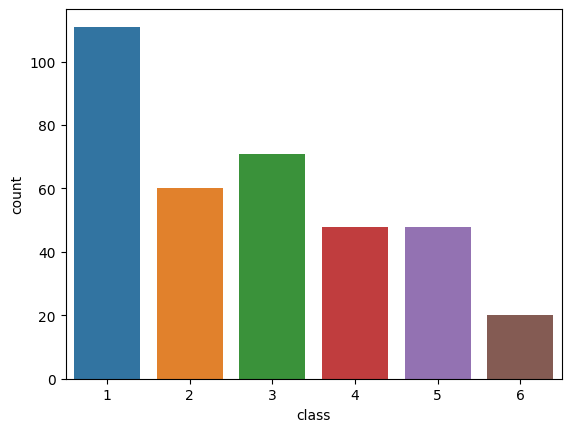

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dataset, x='class')

#**2. Classification Empirical Study**

### **1. Classification Task and the Dataset**

a. What is the goal of the task? Is this for a particular application?

This dataset was created to help in diagnosis of the different types of Erythemato-Squamous Disease (ESD). There are 6 different types of ESD: psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris. Clinicians diagnose the type of ESD by analyzing clinical, histopathology, and family history. It can be difficult to differentiate the type of ESD because they all share similar clinical and histopathology features.

|Class Number |ESD Type Name|
|-----|-----|
|1 |psoriasis  |
|2 |seborrheic dermatitis |
|3 |lichen planus |
|4 |pityriasis rosea |
|5 |chronic dermatitis |
|6 |pityriasis rubra pilaris |

The application that is developed can help with predicting and differentiating between the different types of ESD given the features. When the features are given to the model, it can predict the type of ESD the patient most likely has. This application along with biopsy can increase the likelihood of a correct diagnosis. It can also help clinicians in their data analysis.

b. Characterize the dataset in terms of number of training examples, number of
features, missing data, etc.

|||
|-----|-----|
|Training examples / samples |366  |
|Features / attributes |34 (12 clinical features, 22 histopathological features) |
|Missing data |8 datapoints (age) |
|Classes |6 (psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris) |

###**2. Brainstorm about the Attributes (Feature engineering)**

####(a) Missing or Useful Features

0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.

**Clinical Attributes: (take values 0, 1, 2, 3)**
* 1: erythema
* 2: scaling
* 3: definite borders
* 4: itching
* 5: koebner phenomenon
* 6: polygonal papules
* 7: follicular papules
* 8: oral mucosal involvement
* 9: knee and elbow involvement
* 10: scalp involvement

**Histopathological Attributes: (take values 0, 1, 2, 3)**
* 12: melanin incontinence
* 13: eosinophils in the infiltrate
* 14: PNL infiltrate
* 15: fibrosis of the papillary dermis
* 16: exocytosis
* 17: acanthosis
* 18: hyperkeratosis
* 19: parakeratosis
* 20: clubbing of the rete ridges
* 21: elongation of the rete ridges
* 22: thinning of the suprapapillary epidermis
* 23: spongiform pustule
* 24: munro microabcess
* 25: focal hypergranulosis
* 26: disappearance of the granular layer
* 27: vacuolisation and damage of basal layer
* 28: spongiosis
* 29: saw-tooth appearance of retes
* 30: follicular horn plug
* 31: perifollicular parakeratosis
* 32: inflammatory monoluclear inflitrate
* 33: band-like infiltrate

11: Family history feature is for if any of the diseases was observed in the family (value is 1) or not (value is 0)

34: Age of the patient (Linear / continuous)


**Domain Expertise**

We do not have the domain expertise of a clinician to determine what features are useful in predicting and diagnosing the ESD types. All of the features in the dataset require domain knowledge for dermatology. Therefore, we will keep all the features because we cannot determine which features are not useful without understanding their role in the diagnosis.

When we test the model, we may find trends of which attributes have less impact on the results. But we will keep all attributes because we do not want to remove attributes that may be important to the results.

There are 8 missing data points in the age feature. The solution to the missing values is to remove those samples from the dataset because it is a small number of samples.


####(b) Attribute Ranges and Normalisation

These features are all continuous

|Feature |Value|
|-----|-----|
|Clinical Attributes |0, 1, 2, 3 |
|Histopathological Attributes |0, 1, 2, 3 |
|Family history |1, 0 |
|Age |Linear / continuous |

All of the features use continuous values because they are all numerical data. For example, family history can have the values of 1 or 0, which is already in the form that one-hot encoding would create. Therefore, it is continuous.


**Attribute Normalisation**

Attribute normalisation could be applied on all the data to change the values to be decimals from the interval [0,1]. This will help performance by making the values smaller instead of larger numbers to improve learning rates, convergence and cut down on bias; take age for instance, it can be a number as big as 70, which may introduce unwanted bias due to its initial magnitude. After normalization, it will not view age as a more important feature over the others.

In [ ]:
# Adapted from: https://stackoverflow.com/questions/26414913/normalize-columns-of-a-dataframe
def normalize(df):
    result = df.copy()
    for feature_name in df.columns[:-1]: # last col excluded since it's not a feature column
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
dataset = normalize(dataset)
dataset.head(10)

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,0.666667,0.666667,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.333333,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.333333,0.0,0.733333,2
1,1.000000,1.000000,1.000000,0.666667,0.333333,0.000000,0.0,0.000000,0.333333,0.333333,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.106667,1
2,0.666667,0.333333,0.666667,1.000000,0.333333,1.000000,0.0,1.000000,0.000000,0.000000,...,0.000000,0.666667,1.000000,0.666667,0.0,0.0,0.666667,1.0,0.346667,3
3,0.666667,0.666667,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.666667,...,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.533333,1
4,0.666667,1.000000,0.666667,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.000000,...,0.666667,1.000000,0.666667,1.000000,0.0,0.0,0.666667,1.0,0.600000,3
5,0.666667,1.000000,0.666667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.666667,0.000000,0.0,0.0,0.333333,0.0,0.546667,2
6,0.666667,0.333333,0.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.240000,5
7,0.666667,0.666667,1.000000,1.000000,1.000000,1.000000,0.0,0.666667,0.000000,0.000000,...,0.666667,0.666667,1.000000,0.666667,0.0,0.0,1.000000,1.0,0.760000,3
8,0.666667,0.666667,0.333333,0.000000,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.666667,0.000000,0.0,0.0,0.666667,0.0,0.293333,4
9,0.666667,0.666667,0.333333,0.000000,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.666667,0.000000,0.0,0.0,0.666667,0.0,0.400000,4


We can see that each feature column is nicely normalized from the range [0,1] except for the last column, which is our class.

###**3. Encode the features**

####a. Data encoding and Transformation

The features in the dataset are all continuous and numerical. The use of transformation on the features is not required since Logistic regression requires continuous attributes and Naive Bayes has the GaussianNB classifier which uses continuous attributes. If the dataset had discrete features, then they could be transformed into continuous features using one-hot encoding. If the continuous features need to be transformed into discrete features, then discretization can be used to sort them into buckets.
Therefore, since the features are all using numerical values and they are not using categorical values, they do not need to be transformed.


###b. Logistic Regression:


The data has all the features as continuous features and Logistic regression expects continuous features, so no encoding needs to be performed.

###c. Naive Bayes:

The dataset has all the features as continuous features and the Naive Bayes classifier GaussianNB assumes Gaussian distribution on continuous attributes. Therefore, the data does not need encoding when using the GaussianNB classifier.

# **4. Define the 2 Models using Default Parameters**

 ### (a) **Logistic Regression Model**

 In this particular model, we will make use of the Ordinal subclass of binary regression models. What this allows us to do is to classify more than 2 (binary) types of data. Another option is to "binarize" the 'class' column, but we have not had the need to do that; this method of ordinal classification is sufficient in showing the model works, i.e.: we obtain high precision, recall and f1-scores.


In [ ]:
# https://www.datacamp.com/tutorial/understanding-logistic-regression-python
from sklearn.linear_model import LogisticRegression

def Logistic_Regression(model, X_train, X_test, y_train, y_test):

  # Create an instance of Logistic Regression Classifier and fit the data.
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  # Testing for accuracy
  accuracy = accuracy_score(y_pred, y_test)
  f1 = f1_score(y_pred, y_test, average="weighted")

  print("Accuracy:", accuracy)
  print("F1 Score:", f1)

  return y_test, y_pred


Accuracy: 0.9831932773109243
F1 Score: 0.9831932773109243


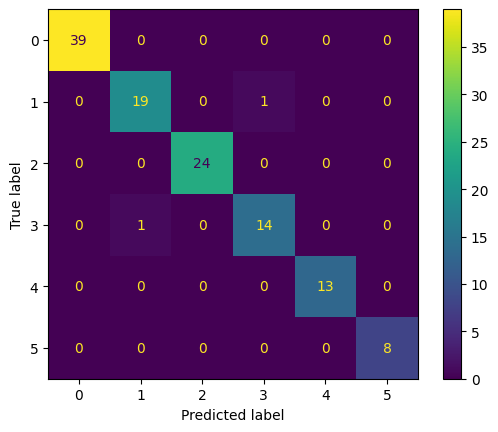

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

ds_lg = dataset.copy()
X_lg = ds_lg.iloc[:, :-1]  # all columns except the last are features.
y_lg = ds_lg['class']

# split the dataset into training and testing sets
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y_lg, test_size=0.33, random_state=16)

model_lg = LogisticRegression(tol=1e-4, solver="lbfgs")
y_test_lg, y_pred_lg = Logistic_Regression(model_lg, X_train_lg, X_test_lg, y_train_lg, y_test_lg)


# Confusion matrix heat map used to visualize the accuracy on the test
cnf_matrix_lg = metrics.confusion_matrix(y_test_lg, y_pred_lg)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_lg)
disp.plot();

In [ ]:
print(classification_report(y_test_lg, y_pred_lg))
f1_micro_lg = f1_score(y_test_lg, y_pred_lg, average='micro')
print("Micro-average F1 score: ", f1_micro_lg)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        39
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        24
           4       0.93      0.93      0.93        15
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         8

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119

Micro-average F1 score:  0.9831932773109243


###**(b) Naïve Bayes Model**

The Naive Bayes classifier is based on applying Bayes theorem and it has a conditional independence assumption. The learning process for Naive Bayes involves calculating the probability of an event using prior and posterior probability. Calculating the probabilities will determine the class for the predictions and classification. Naive Bayes requires discrete features, but Gaussian Naive Bayes can use continuous features. Gaussian Naive Bayes assumes that the likelihood of features is Gaussian.


In [ ]:
# set X to all the features except the class column
X_nb = dataset.drop('class', axis = 1)

# set y to the class column which is the target
y_nb = dataset['class']

In [ ]:
from sklearn.model_selection import train_test_split

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_nb, y_nb, test_size=0.33, random_state=125
)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# function for training a naive bayes model
def Gaussian_nb(model, X_train_nb, X_test_nb, y_train_nb, y_test_nb):
  # Build the Gaussian Classifier / Model
  model_nb = model

  # training the model using the training set
  model_training_nb = model_nb.fit(X_train_nb, y_train_nb)

  # use the model to make predictions on the testing set
  y_pred_nb = model_nb.predict(X_test_nb)

  # calculate the accuracy and f1 of the results of the prediction to the expected values
  accuracy_nb = accuracy_score(y_test_nb, y_pred_nb)
  f1_nb = f1_score(y_test_nb, y_pred_nb, average="weighted")

  print("Accuracy:", accuracy_nb)
  print("F1 Score:", f1_nb)

  return y_test_nb, y_pred_nb

In [ ]:
# create the Naive Bayes Gaussian model with default parameters
model_nb = GaussianNB()

# train and test the model given the training and testing sets
y_test_nb, y_pred_nb = Gaussian_nb(model_nb, X_train, X_test, y_train, y_test)

Accuracy: 0.865546218487395
F1 Score: 0.850934512434107


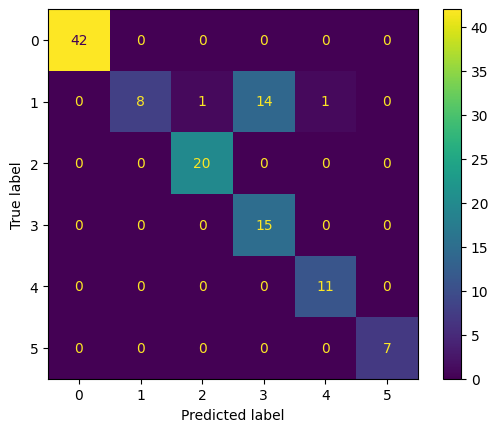

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

# build the confusion matrix using expected and predicted
cm = confusion_matrix(y_test_nb, y_pred_nb)

# build the display for the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# show the confusion matrix
disp.plot();

In [ ]:
# calculate the performance measures using the expected and predicted results
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# calculate the precision, recall, and averages
print(classification_report(y_test_nb, y_pred_nb))

# calculate and print the micro average
f1 = f1_score(y_test_nb, y_pred_nb, average='micro')
print("Micro-average F1 score: ", f1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        42
           2       1.00      0.33      0.50        24
           3       0.95      1.00      0.98        20
           4       0.52      1.00      0.68        15
           5       0.92      1.00      0.96        11
           6       1.00      1.00      1.00         7

    accuracy                           0.87       119
   macro avg       0.90      0.89      0.85       119
weighted avg       0.92      0.87      0.85       119

Micro-average F1 score:  0.865546218487395


# **5. Train/Test/Evaluation on Models in Cross-Validation**

###(a) Using 4-fold validation

Each fold is then used once as a validation while the k - 1 remaining folds form the training set.



In [ ]:
import numpy as np

# need to convert to np arrays to split the dataset for kfold

# convert the features to a numpy array
X_kf = np.array(dataset.drop('class', axis=1))

# convert the target class column to a numpy arrray
y_kf = np.array(dataset['class'])

In [ ]:
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# function for 4 fold validation for a given model
def k_fold(model_kf, verbose):

  # the models predictions for the classes
  predicted_y = []

  # the expected target values for the classes
  expected_y = []

  # creates the indexes for 4 folds with shuffling
  kf = KFold(n_splits=4, shuffle=True)

  # go through each fold of training and testing sets
  # this will loop 4 times for 4 folds
  for i, (train_indexes, test_indexes) in enumerate(kf.split(X_kf)):
    print(f"Fold {i+1}:")
    if verbose:
      print(f"  Train: index={train_indexes}")
      print(f"  Test:  index={test_indexes}")

    # train the model on the current folds training set
    model_training_kf = model_kf.fit(X_kf[train_indexes], y_kf[train_indexes])

    # use the model to make predictions on the current folds testing set
    y_pred_kf = model_kf.predict(X_kf[test_indexes])

    # the expected results of the current fold testing set
    y_exp_kf = y_kf[test_indexes]

    # add the predictions to the list
    predicted_y.extend(y_pred_kf)

    # add the expected values of the folds testing set to the list
    expected_y.extend(y_exp_kf)

    # calculate the accuracy and f1 score
    accuracy_kf = accuracy_score(y_exp_kf, y_pred_kf)
    f1_kf = f1_score(y_exp_kf, y_pred_kf, average="weighted")
    print("Accuracy:", accuracy_kf)
    print("F1 Score:", f1_kf)

  return expected_y, predicted_y

####(i) 4-fold for Logistic Regression model:

In [ ]:
expected_y_lg, predicted_y_lg = k_fold(model_lg,True)

Fold 1:
  Train: index=[  2   3   5   6  10  13  14  15  16  19  20  21  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  40  44  46  48  49  50  53  54  55
  56  57  58  59  60  61  62  63  64  66  67  68  69  70  71  72  73  74
  75  76  78  79  81  82  83  85  86  88  89  90  91  92  95  96  97  98
  99 100 103 104 105 107 108 110 111 112 113 114 115 116 117 118 119 121
 123 125 126 127 129 131 133 134 135 136 139 140 142 143 144 145 147 148
 149 150 151 152 153 154 155 157 158 159 160 161 162 163 164 166 167 169
 171 172 173 174 175 176 177 179 180 181 182 183 186 187 188 189 190 191
 192 193 194 196 198 199 201 202 203 204 206 207 210 211 214 216 218 221
 222 224 225 226 227 228 229 230 233 235 236 241 242 243 244 245 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 263 264 265 266 269
 270 271 272 273 274 276 277 278 279 280 281 283 284 285 287 288 289 290
 292 293 294 296 297 298 299 300 301 302 303 304 305 306 307 309 310 311
 312 313 314 315 316 317 321

In [ ]:
#average of all 4 fold accuracy scores for the Logistic Regression model
print(accuracy_score(expected_y_lg, predicted_y_lg))

0.9692737430167597


####(ii) 4-fold for GaussianNB model:

In [ ]:
expected_y_nb, predicted_y_nb = k_fold(model_nb,True)

Fold 1:
  Train: index=[  0   3   4   5   6   7   9  11  12  13  14  15  16  17  18  19  20  22
  24  26  27  29  30  31  32  33  35  38  39  40  41  42  44  46  47  49
  50  51  53  54  55  56  57  58  59  61  62  63  64  65  66  68  70  71
  72  73  74  75  76  78  79  82  83  84  85  86  87  88  89  90  91  92
  94  95  96  97  98  99 100 101 102 103 104 106 107 108 109 111 113 115
 116 118 119 121 122 123 125 126 128 129 130 131 132 133 134 135 136 138
 140 141 143 144 146 147 148 149 150 153 154 155 158 160 161 162 163 165
 167 168 169 170 171 175 177 178 179 181 182 183 184 185 186 188 189 190
 191 192 193 194 196 197 198 199 200 201 202 204 205 206 207 208 209 211
 212 213 214 215 217 218 220 221 222 223 225 227 228 231 232 234 235 236
 237 238 239 240 241 242 244 247 248 249 251 253 254 256 257 258 259 262
 264 265 267 270 271 272 273 275 277 278 279 280 284 285 286 288 289 290
 291 292 293 295 296 297 299 300 301 302 303 304 305 306 308 309 310 312
 313 314 315 316 318 320 322

In [ ]:
# average of all 4 fold accuracy scores for the Gaussian naive bayes model
print(accuracy_score(expected_y_nb, predicted_y_nb))

0.8715083798882681


###(b) Evaluation with Precision/Recall Measures and Micro/Macros

Precision = TP / (TP + FP)
Recall = TP / (TP + FN)

There are 6 classes that we are trying to predict, so we need to calculate the precision and recall measure for each class.  

Model 1: Logistic Regression

In [ ]:
# calculate the precision, recall, and averages for 4 fold results
print(classification_report(expected_y_lg, predicted_y_lg))

# calculate and print the micro average
f1 = f1_score(expected_y_lg, predicted_y_lg, average='micro')
print("Micro-average F1 score: ", f1)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           2       0.92      0.92      0.92        60
           3       1.00      0.99      0.99        71
           4       0.88      0.90      0.89        48
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        20

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358

Micro-average F1 score:  0.9692737430167597



Model 2: Naive Bayes

In [ ]:
# calculate the precision, recall, and averages for 4 fold results
print(classification_report(expected_y_nb, predicted_y_nb))

# calculate and print the micro average
f1 = f1_score(expected_y_nb, predicted_y_nb, average='micro')
print("Micro-average F1 score: ", f1)

              precision    recall  f1-score   support

           1       0.99      1.00      1.00       111
           2       0.89      0.28      0.43        60
           3       0.99      1.00      0.99        71
           4       0.57      0.98      0.72        48
           5       0.92      0.98      0.95        48
           6       0.90      0.95      0.93        20

    accuracy                           0.87       358
   macro avg       0.88      0.87      0.84       358
weighted avg       0.90      0.87      0.85       358

Micro-average F1 score:  0.8715083798882681


Micro Average: average when putting all the data together.
The micro average puts all the data together and divides by all the classes total. The weight won't be equal and it is based on the number of samples. The micro average works for an unbalanced training set.

(TP1 + TP2 + TP3 + TP4 + TP5 + TP6) / (TP1 + FP1 + TP2 + FP2 + TP3 + FP3 + TP4 + FP4 + TP5 + FP5 + TP6 + FP6)



In [ ]:
micro_lg = f1_score(expected_y_lg, predicted_y_lg, average='micro')
micro_nb = f1_score(expected_y_nb, predicted_y_nb, average='micro')
print("Regression Micro-average F1 score: ", micro_lg)
print("Gaussian Micro-average F1 score: ", micro_nb)

Regression Micro-average F1 score:  0.9692737430167597
Gaussian Micro-average F1 score:  0.8715083798882681


Macro Average: average on the results per class.
The macro average is calculated on each class and then gets the average over all that no matter how much training data. It gives each class equal weight.

(Prec1 + Prec2 + Prec3 + Prec4 + Prec5 + Prec6) / 6


Logistic Regression: The macro average on precision and recall is 0.98.

Gaussian Naive Bayes: The macro average on precision is 0.89 and on recall is 0.87.  

# **6. Train/Test/Evaluate on Changed Parameters**


###(a) Models with Changed Parameters

More specifically, for each of these models, there will be 2 models per parameter changed; with a running total of 5 models for both Logistic Regression and the GaussianNB model:

*   +1 for the default model,
*   +2 for first parameter,
*   +2 for second parameter.

####Model 1: Logistic Regression

The following parameters will be changed (twice for each parameter; total of 4 + 1 (default) models)

1.   Tolerance: with a default of 1e-4
2.   Solver: default is "lbfgs"



In [ ]:
# Tolerance = 3, default solver
model_lg_lg_t1 = LogisticRegression(tol=3, solver="lbfgs")
exp_y_lg_t1, pred_y_lg_t1 = k_fold(model_lg_lg_t1,False)

Fold 1:
Accuracy: 0.9666666666666667
F1 Score: 0.9661913250148544
Fold 2:
Accuracy: 0.9666666666666667
F1 Score: 0.9666295884315906
Fold 3:
Accuracy: 0.9662921348314607
F1 Score: 0.9662921348314607
Fold 4:
Accuracy: 0.9887640449438202
F1 Score: 0.9888503426017017


####Model 2: Naive Bayes
The parameters that will be changed are the 'priors' and 'var_smoothing'.


There are two parameters for GaussianNB:


*   priors: prior probabilities of the classes
*   var_smoothing: decimal from 0 to 1 (usually)



In [ ]:
from sklearn.naive_bayes import GaussianNB

The smoothing parameter is for the portion of the largest variance of all features that is added to variances. The default is 1e-9 = 0.000000001. Variance “is a measure of how far a set of numbers is spread out from their average value”. The model has a variance attribute var_ that can show the variance of each feature per class.

First we will try to change the smoothing parameter to be large as a 1.

In [ ]:
# Build a Gaussian Classifier with var_smoothing changed
model_nb_s1 = GaussianNB(priors = None, var_smoothing = 1.0)

exp_y_nbs1, pred_y_nbs1 = k_fold(model_nb_s1,False)

Fold 1:
Accuracy: 0.9666666666666667
F1 Score: 0.9663299663299664
Fold 2:
Accuracy: 0.9111111111111111
F1 Score: 0.9154684095860568
Fold 3:
Accuracy: 0.9662921348314607
F1 Score: 0.9662644567398178
Fold 4:
Accuracy: 0.9775280898876404
F1 Score: 0.9774128493229616


Priors is a list of probabilities for each class. Prior probabilities would be information from the real world data and be gathered after evidence and research of the domain. For this case, it would be if we had information about what types of ESD were more or less common among the 6 types. The model has an attribute class_prior_ that shows the probability of each class, but this is only for this particular dataset.

In [ ]:
print(model_nb.class_prior_)

[0.30483271 0.18959108 0.20446097 0.12639405 0.11524164 0.05947955]


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier with priors changed
model_nb_p1 = GaussianNB(priors = [0.1, 0.25, 0.25, 0.1, 0.1, 0.2])

exp_y_nbp1, pred_y_nbp1 = k_fold(model_nb_p1,False)

Fold 1:
Accuracy: 0.9111111111111111
F1 Score: 0.9072923901921683
Fold 2:
Accuracy: 0.8333333333333334
F1 Score: 0.7918503229751939
Fold 3:
Accuracy: 0.8089887640449438
F1 Score: 0.7747607783503703
Fold 4:
Accuracy: 0.9101123595505618
F1 Score: 0.9029622063329928


# **7. Analysis on Results**

Quantitative comparison made on precision, recall, micro and macro values on Logistic Regression and GaussianNB models.

## (a) Logistic Regression

### (i) Tolerance Parameter Analysis

In [ ]:
# Classification reports on Logistic Regression
# Default model (tolerance = 1e-4, solver = 'lbfgs)
print(classification_report(expected_y_lg, predicted_y_lg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           2       0.92      0.92      0.92        60
           3       1.00      0.99      0.99        71
           4       0.88      0.90      0.89        48
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        20

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358



In [ ]:
# Default model (tolerance = 1e-4, solver = 'lbfgs)
print(classification_report(expected_y_lg, predicted_y_lg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       111
           2       0.92      0.92      0.92        60
           3       1.00      0.99      0.99        71
           4       0.88      0.90      0.89        48
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        20

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358



## (b) GaussianNB

### (i) Smoothing Parameter Analysis

In [ ]:
# smoothing factor 1.0
print(classification_report(exp_y_nbs1, pred_y_nbs1))

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       111
           2       0.98      0.75      0.85        60
           3       1.00      1.00      1.00        71
           4       0.76      1.00      0.86        48
           5       1.00      1.00      1.00        48
           6       1.00      1.00      1.00        20

    accuracy                           0.96       358
   macro avg       0.96      0.96      0.95       358
weighted avg       0.96      0.96      0.96       358



<Axes: xlabel='class', ylabel='count'>

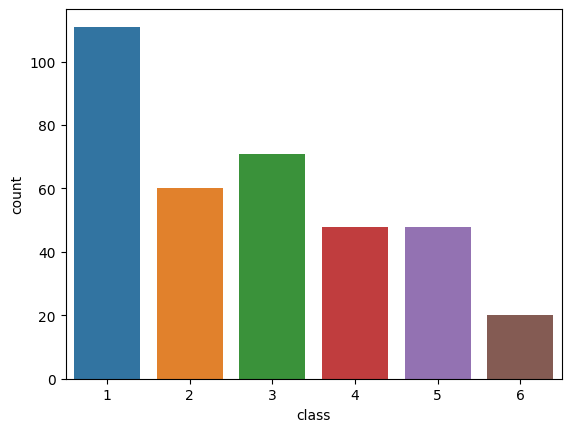

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=dataset, x='class')

###(ii) 'Priors' Parameter Analysis

In [ ]:
# changed priors to [0.1, 0.25, 0.25, 0.1, 0.1, 0.2]
print(classification_report(exp_y_nbp1, pred_y_nbp1))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       111
           2       0.94      0.27      0.42        60
           3       0.99      1.00      0.99        71
           4       0.55      0.96      0.70        48
           5       0.90      0.98      0.94        48
           6       0.95      0.95      0.95        20

    accuracy                           0.87       358
   macro avg       0.89      0.86      0.83       358
weighted avg       0.91      0.87      0.85       358



# **8. References**


1.   https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter
2.   https://medium.com/@shouke.wei/how-to-create-and-align-tables-in-the-jupyter-notebook-ad7614d3d22
3.   https://www.youtube.com/watch?v=0Lt9w-BxKFQ
4.   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
5.   https://stackoverflow.com/questions/50599895/choosing-a-proper-tolerance-value-in-logistic-regression-scikit-learn
6.  https://stackoverflow.com/questions/30896367/how-to-specify-the-prior-probability-for-scikit-learns-naive-bayes
7.  https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba
8.  https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB
9.  https://stackoverflow.com/questions/58046129/can-someone-give-a-good-math-stats-explanation-as-to-what-the-parameter-var-smoo
10. https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
11. https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fstackoverflow.com%2Fquestions%2F28277137%2Fhow-to-convert-datatypeobject-to-float64-in-python
12. https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe
13. https://stackoverflow.com/questions/72007179/python-pandas-dataframe-column-sentence-encode-got-error-keyerror-611.
14. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5203752/
15. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
16. https://datascience.stackexchange.com/questions/49185/categorical-vs-continuous-feature-selection-engineering

17. https://stats.stackexchange.com/questions/288095/what-algorithms-require-one-hot-encoding

18. https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

19. https://stats.stackexchange.com/questions/371152/reasons-not-to-one-hot-encode-categorical-features

20. Fall2020-CSI4106-Module4-Video3-SML-Part2-Features17.
21. https://www.youtube.com/watch?v=_dWNReULL9E
22. https://www.youtube.com/watch?v=etkxDx4gesk
23. https://www.youtube.com/watch?v=gJo0uNL-5Qw
24. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
25.  https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
26. https://www.youtube.com/watch?v=L_dQrZZjGDg
27. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
28. https://www.youtube.com/watch?v=6dDet0-Drzc

29. https://stackoverflow.com/questions/40667363/python-transform-data-to-numpy-array-for-sklearn

30. https://scikit-learn.org/stable/modules/preprocessing.html
31. https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes
32. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

33. https://www.datacamp.com/tutorial/naive-bayes-scikit-learn

34. https://www.youtube.com/watch?v=0Lt9w-BxKFQ
35. https://www.youtube.com/watch?v=pqNCD_5r0IU
36. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
37. Fall2020-CSI4106-Module4-Video8-NaiveBayes-Part3-Independence

